In [1]:
import pandas as pd

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent Parameters
alpha = learning_rate = 0.01
iterations = 1000

Like last time, generate synthetic date with $\beta_0 = 5$ and $\beta_1 = 3$. 1000 points should be fine. You should have an array of x and y values.

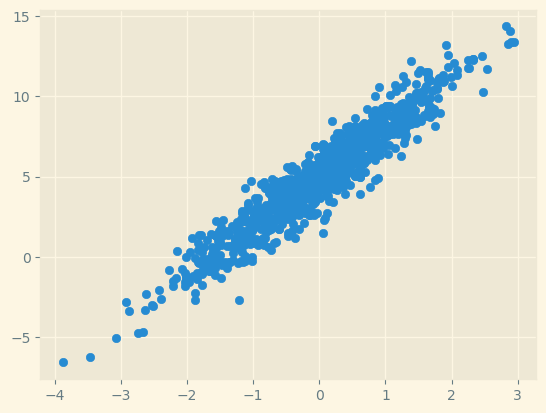

In [182]:
## more of a chance our GD will fail if our numbers are too far from each other so ppl normally will scale-- 
## for now we can generate random numbers from a normal distribution 
x = np.random.randn(1000)
y = 5+ 3*x + np.random.randn(1000)
plt.scatter(x,y)
plt.style.use('Solarize_Light2')
plt.show()

In the real world, you do not know these beta values. Your goal is to find them! So, pretending you do not know $\beta_0 = 5$ and $\beta_1 = 3$, proceed as if you only observe x and y.

First, randomly guess $\beta_0$ and $\beta_1$, using the random operations in numpy.

In [96]:
x,y

(array([ 9.51406871e-01,  1.50947818e+00, -1.23646795e-01, -4.49904862e-01,
         8.45413178e-01,  2.24722548e-01,  8.02120635e-03,  8.65330818e-01,
         1.09740954e+00,  1.98574907e-01,  1.14228300e+00, -3.13921864e-01,
        -9.39292402e-02,  4.83429475e-01,  7.32010334e-02, -1.64763008e+00,
        -1.37141648e+00,  2.72231936e-01,  9.84997369e-01, -4.85243271e-01,
        -3.00263215e-01, -1.23945353e+00, -3.61591978e-02,  8.97611429e-02,
         9.36295386e-01,  6.08092218e-02,  7.93901498e-01,  6.40456745e-01,
        -3.19248462e-01,  2.60249471e-01, -1.20785029e+00, -1.08262351e+00,
         1.35837615e+00,  2.03320359e+00,  3.28505742e-01, -1.05633281e+00,
         1.28285305e+00, -4.24176486e-01, -3.24481166e-02, -1.07574440e+00,
        -5.39573408e-01,  4.36993932e-01,  9.98842073e-01,  1.67426138e-01,
        -7.60411828e-01, -6.05474766e-01, -5.10481013e-01,  1.52664318e-01,
        -3.00149438e-01, -9.58513116e-01, -4.64874908e-01,  3.42804205e-01,
        -1.1

In [205]:
b0_ = np.random.randint(10)
b1_ = np.random.randint(10)
b0_,b1_

(3, 8)

Write a function to compute the cost. This should be $\frac{1}{n} \sum ( y_{pred} - y )^2$. This is known as mean square loss. Your function should take in the real x and y values, then your guess of b0 and b1, then compute the loss.

In [207]:

def cost( x_act, y_act, b0, b1):
    
    y_pred = (b1 * x_act) + b0 
    return np.sum(np.square(y_pred-y))/len(x_act)
    
n = 1000
b0 = np.random.randint(1,10)
b1 = np.random.randint(1,10)
print(f'Loss calculated = {cost( x, y, b0, b1) }, with b1 set to {b1}, and b0 set to {b0}.')

Loss calculated = 1.9933054115284312, with b1 set to 3, and b0 set to 6.


We are now going to walk through one iteration of gradient descent.
* Using the existing guesses for $\beta_0$ and $\beta_1$, generate predictions for y
* Calculate the gradients for $\beta_0$ and $\beta_1$ then use it to update the existing $\beta$ values.
* Compute the cost.

In [211]:
# Code for one iteration.
def new(b0, b1, x, y, learning_rate): 
    y_pred = (b1 * x) + b0 
    
    b0 = b0 - learning_rate * np.sum(y_pred - y) / len(y)
    b1 = b1 - learning_rate * np.sum((y_pred - y) * x) / len(y)
    
    return b0,b1

new(b0, b1, x, y, 0.1)

(5.899498969008858, 3.00696801188871)

Write a for loop that iterates through the total iterations (1000). Within each loop, update $\beta_0$ and $\beta_1$.

Also, create an empty list that saves the cost each iteration, and two other lists for $\beta_0$ and $\beta_1$. You want to see that the loss is going down. To check this, print the loss every 100 iterations.

In [141]:
# Gradient Descent Function
def gradient_descent(x, y, learning_rate, iterations):
    cost_history = []
    b0_hist = []
    b1_hist = [] 
    
    b0 = np.random.randint(0,100)
    b1 = np.random.randint(0,100)
    
    for i in range(iterations): 
        y_pred = b1 * x + b0
        
        b0 = b0 - learning_rate * np.sum(y_pred - y) / len(y)
        b0_hist.append(b0)
        
        b1 = b1 - learning_rate * np.sum((y_pred - y) * x) / len(y)
        b1_hist.append(b1)
        
        cost_ = cost(x, y, b0, b1)
        cost_history.append(cost_)

        if i % 100 == 0:
            print(cost_)

    return b0_hist, b1_hist, cost_history

# Run Gradient Descent
b0_hist, b1_hist, cost_history = gradient_descent(x, y, learning_rate, iterations)

4567.434909130092
639.528608719481
90.35860150211755
13.50707973531363
2.7427648409650547
1.233739481913919
1.02201522994825
0.9922851472966918
0.9881072240095646
0.9875196656907397


Plot a scatter plot of the x and y, then your regression line. You should use plt.plot and input predicted y values based on $x_{min}$ and $x_{max}$.

In [131]:
y1 = b1 * x.min() + b0
y2 = b1 * x.max() + b0
x_list = [x.min(), x.max()]
y_list = [y1,y2]

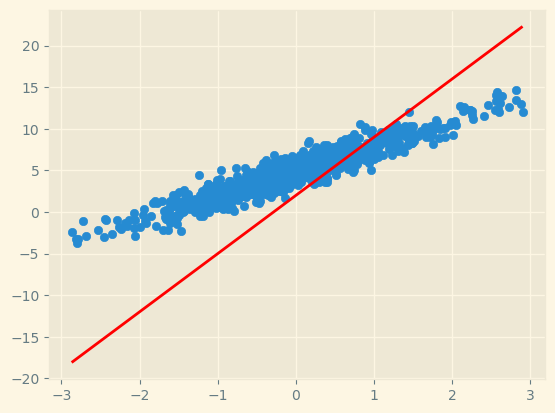

In [181]:

y1 = b1 * x.min() + b0
y2 = b1 * x.max() + b0
x_list = [x.min(), x.max()]
y_list = [y1,y2]
plt.scatter(x,y)
plt.plot(x_list,y_list, c = 'r')
plt.style.use('Solarize_Light2')
plt.show()

Plot the cost overtime. X-axis is the iteration, y-axis is the cost.

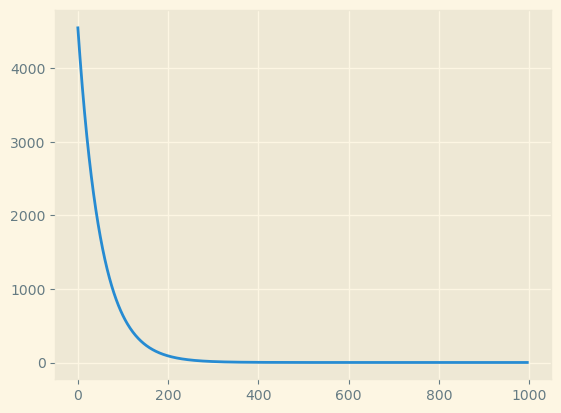

In [180]:
ind = [i for i,v in enumerate(cost_history)]
plt.plot(ind, cost_history)
plt.style.use('Solarize_Light2')
plt.show()

Plot the evolution of the beta values.

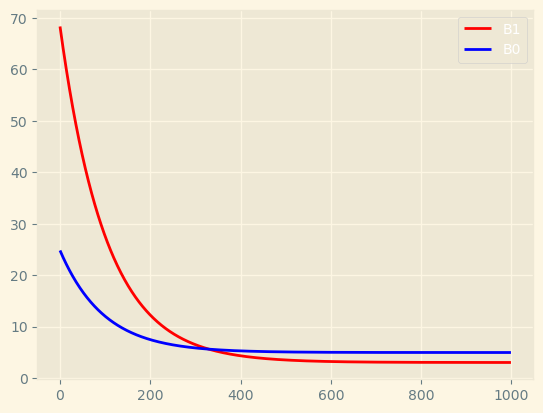

In [177]:
plt.plot(ind, b1_hist, c = 'r', label = 'B1')
plt.plot(ind, b0_hist, c = 'b', label = 'B0')
plt.legend()
plt.style.use('Solarize_Light2')
plt.show()